 Import Libraries and Load Data

In [14]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('/Users/aghgang/Downloads/personalproject/creditcard.csv')

# Display the first few rows of the dataset
print(data.head())



   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Explore the dataset to understand its structure and check for missing values.

In [15]:
# Check the shape of the data
print(f"Data Shape: {data.shape}")

# Get basic information about the data
print(data.info())

# Check for missing values
print(f"Missing values in each column:\n{data.isnull().sum()}")


Data Shape: (284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null

Visualize the data to understand its distribution and identify any patterns.

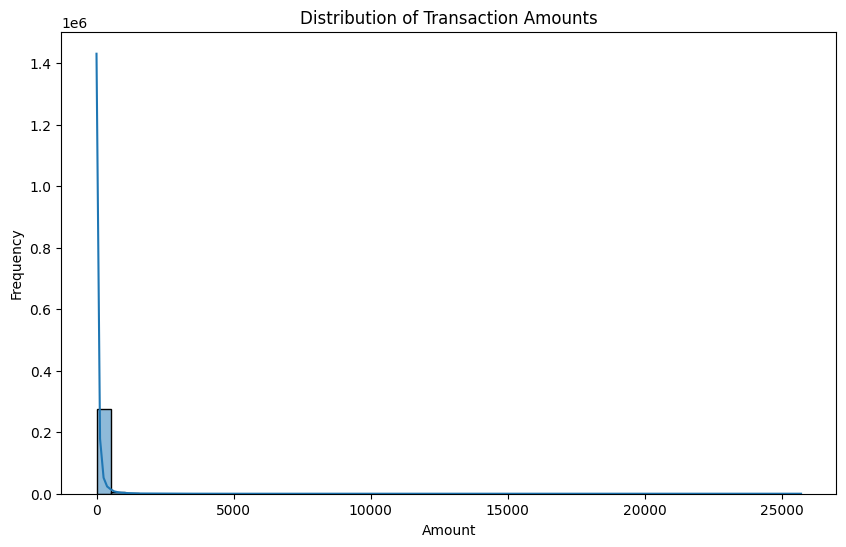

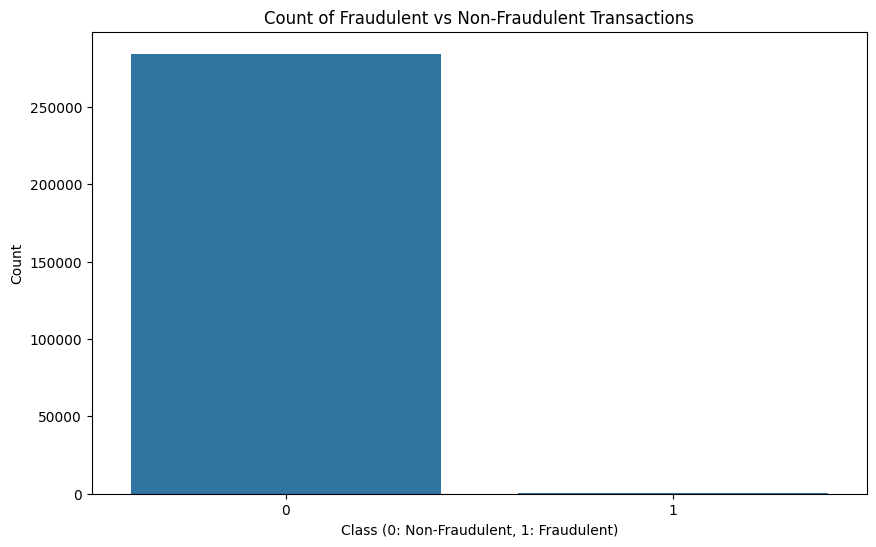

In [16]:
# Plot the distribution of the 'Amount' column
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Plot the count of fraudulent vs non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=data)
plt.title('Count of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()


Preprocess the data by scaling the features.

In [17]:
# Scaling the 'Amount' and 'Time' features
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['Time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))

# Display the first few rows of the preprocessed data
print(data.head())


       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996583  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996562 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996562 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996541 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28    Amount  Class  
0  0.12

Split the data into training and testing sets.

In [18]:
# Define features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (227845, 30)
Testing set shape: (56962, 30)


Train the Isolation Forest model to detect anomalies

In [20]:
# Train the Isolation Forest model
model = IsolationForest(contamination=0.01, random_state=42)
model.fit(X_train)

# Predict anomalies in the test set
y_pred = model.predict(X_test)
y_pred


array([-1,  1,  1, ...,  1,  1,  1])

Evaluate the model's performance using metrics like accuracy, precision, recall, and the F1 score.

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.63      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.81      0.59     56962
weighted avg       1.00      0.99      0.99     56962



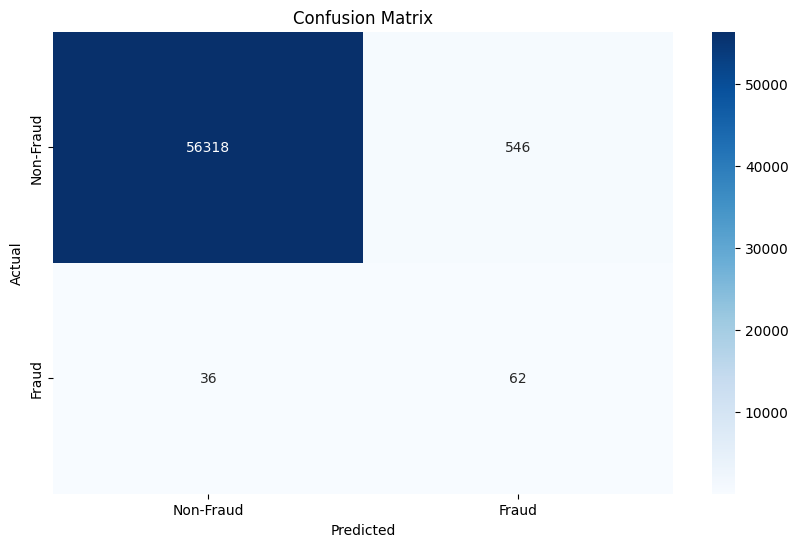

In [21]:
# Convert predictions to binary output
y_pred_binary = [1 if x == -1 else 0 for x in y_pred]

# Print the classification report
print(classification_report(y_test, y_pred_binary))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Interpret the results to understand the effectiveness of the model.

In [22]:
# Generate and display the classification report
report = classification_report(y_test, y_pred_binary, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Print the classification report
print(report_df)

# Save the report to a CSV file
report_df.to_csv('/Users/aghgang/Downloads/personalproject/classification_report.csv')



              precision    recall  f1-score       support
0              0.999361  0.990398  0.994859  56864.000000
1              0.101974  0.632653  0.175637     98.000000
accuracy       0.989783  0.989783  0.989783      0.989783
macro avg      0.550667  0.811526  0.585248  56962.000000
weighted avg   0.997817  0.989783  0.993450  56962.000000


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.18      0.03      0.05        98

    accuracy                           1.00     56962
   macro avg       0.59      0.52      0.53     56962
weighted avg       1.00      1.00      1.00     56962



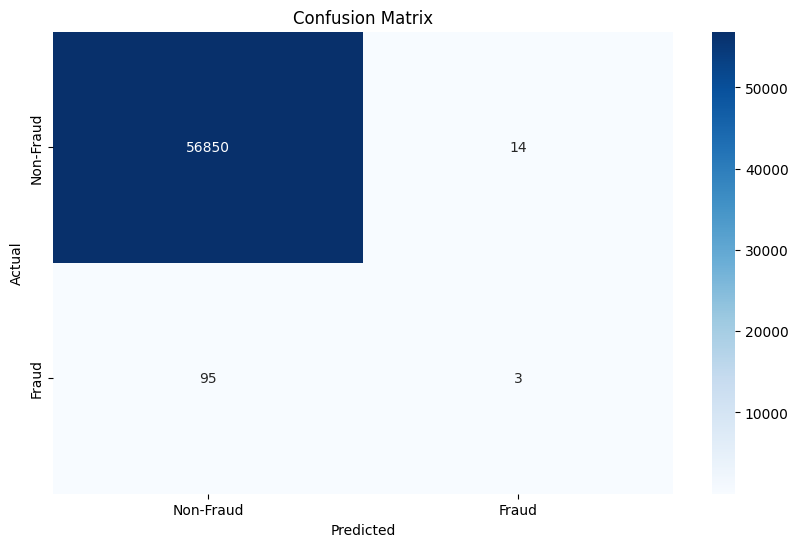

In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
data = pd.read_csv('/Users/aghgang/Downloads/personalproject/creditcard.csv')

# Define features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the SMOTE technique
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Scale the data
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Train the Isolation Forest model on resampled data
model = IsolationForest(contamination=0.01, random_state=42)
model.fit(X_train_res_scaled)

# Predict anomalies in the test set
y_pred = model.predict(X_test_scaled)

# Convert predictions to binary output
y_pred_binary = [1 if x == -1 else 0 for x in y_pred]

# Display the classification report
print(classification_report(y_test, y_pred_binary))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



The results indicate that the model still has high precision and recall for the non-fraudulent class (0) but struggles significantly with the fraudulent class (1). Specifically, it has a low recall and F1-score for detecting fraud. This is a common challenge in fraud detection due to the imbalanced nature of the data.

One-Class SVM algorithm for anomaly detection:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.02      0.12      0.03        98

    accuracy                           0.99     56962
   macro avg       0.51      0.55      0.51     56962
weighted avg       1.00      0.99      0.99     56962



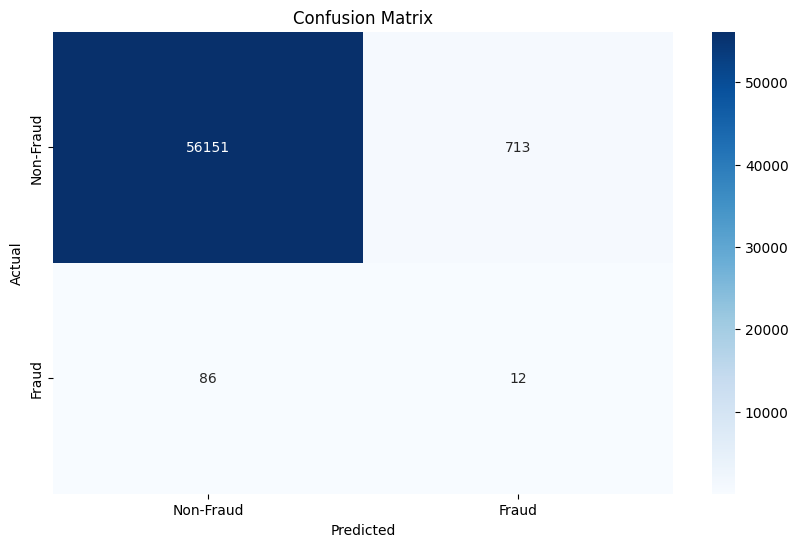

In [24]:
from sklearn.svm import OneClassSVM

# Train the One-Class SVM model
ocsvm_model = OneClassSVM(kernel='rbf', nu=0.01, gamma='auto')
ocsvm_model.fit(X_train_res_scaled)

# Predict anomalies in the test set
y_pred = ocsvm_model.predict(X_test_scaled)

# Convert predictions to binary output
y_pred_binary = [1 if x == -1 else 0 for x in y_pred]

# Display the classification report
print(classification_report(y_test, y_pred_binary))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
